In [1]:
import pandas as pd
import numpy as np
import pyreadr
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Modelo de Regressão Linear Simples <br> 
## DIAGNÓSTICO DE MULTICOLINEARIDADE

Exmplo da aula do MBA DSA USP/ESALQ com Prof. Fávero e Belfiore

**Correlação elevada entre variáveis explicativas.**

Exemplo:

Modelo de concessão de crédito a renda sai do modelo porque outras variáveis já conseguem explicá-la (tempo de formado, saldo em investimento).

Não é porque a renda saiu que ela não é importante para explicar a variável dependente.

<b>Uma variável no modelo múltiplo pode apresentar um beta não estatisticamente significante em função de:

1) A correlação entre ela e o Y já não é estatisticamente significante individualmente;<br>
2) Pode não ser considerada em função de problemas de correlação com outras variáveis explicativas (multicolinearidade); <br>
3) Na forma funcional não linear; </b>

## Aplicação MQO (OLS)

1) Estimação do modelo linear com stepwise<br>
2) Aplica teste Shapiro Francia nos resíduos:<br>
- Deu aderência à normalidade? Modelo validado <br>
- Não deu aderência à normalidade? Aplica transformação Box-Cox <br>

3) Aplica modelo novamente com stepwise<br>
4) Aplica teste shapiro Francia novamente nos resíduos:



## Contexto

Salário de cada pessoa em unidades monetárias no primeiro mês após a formatura.
Notas da matéria de RH e Econometria.

AS pessoas que tiraram notas maiores em RH possuem salários maiores ou vice-versa?

Salário em função das notas de RH e Econometria com 3 cenários.

In [2]:
#Importa base e transforma em objeto
rData = pyreadr.read_r(r'bases\salarios.RData')

#Verifica o nomne do objeto
print(rData.keys())

odict_keys(['salarios'])


In [3]:
#Transforma o objeto em um pandas DataFrame
salarios = rData['salarios']
salarios.head()

,nome,salario,rh1,econometria1,rh2,econometria2,rh3,econometria3
0,Patricia,2525.340820,9.0,4.50,9.0,4.50,3.0,9.0
1,Luiz,2498.574951,8.0,4.00,8.0,4.00,7.0,8.0
2,Dalila,2364.686768,9.5,4.75,9.5,4.75,10.0,9.5
3,Leonor,1981.349854,7.0,3.50,7.0,3.50,10.0,7.0
4,Ovidio,1892.807983,6.0,3.00,6.0,3.10,7.0,6.0


### Análise de Correlação

In [4]:
salarios.describe()

,salario,rh1,econometria1,rh2,econometria2,rh3,econometria3
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,2032.150578,6.400000,3.200000,6.400000,3.240000,7.180000,6.400000
std,312.507361,2.221647,1.110823,2.221647,1.061367,3.169317,2.221647
min,1505.627563,3.000000,1.500000,3.000000,1.500000,1.400000,3.000000
25%,1870.515320,4.500000,2.250000,4.500000,2.250000,4.450000,4.500000
50%,2001.654297,7.000000,3.500000,7.000000,3.500000,8.000000,7.000000
75%,2219.607788,8.000000,4.000000,8.000000,4.000000,9.950000,8.000000
max,2525.340820,9.500000,4.750000,9.500000,4.750000,10.000000,9.500000


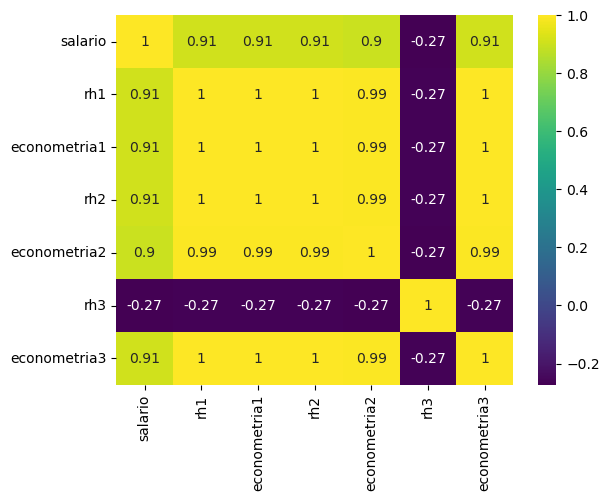

In [9]:
matriz_corr = salarios.corr()

#Gráfico matriz correlação

sns.heatmap(matriz_corr, cmap=plt.cm.viridis, annot=True)
plt.show()

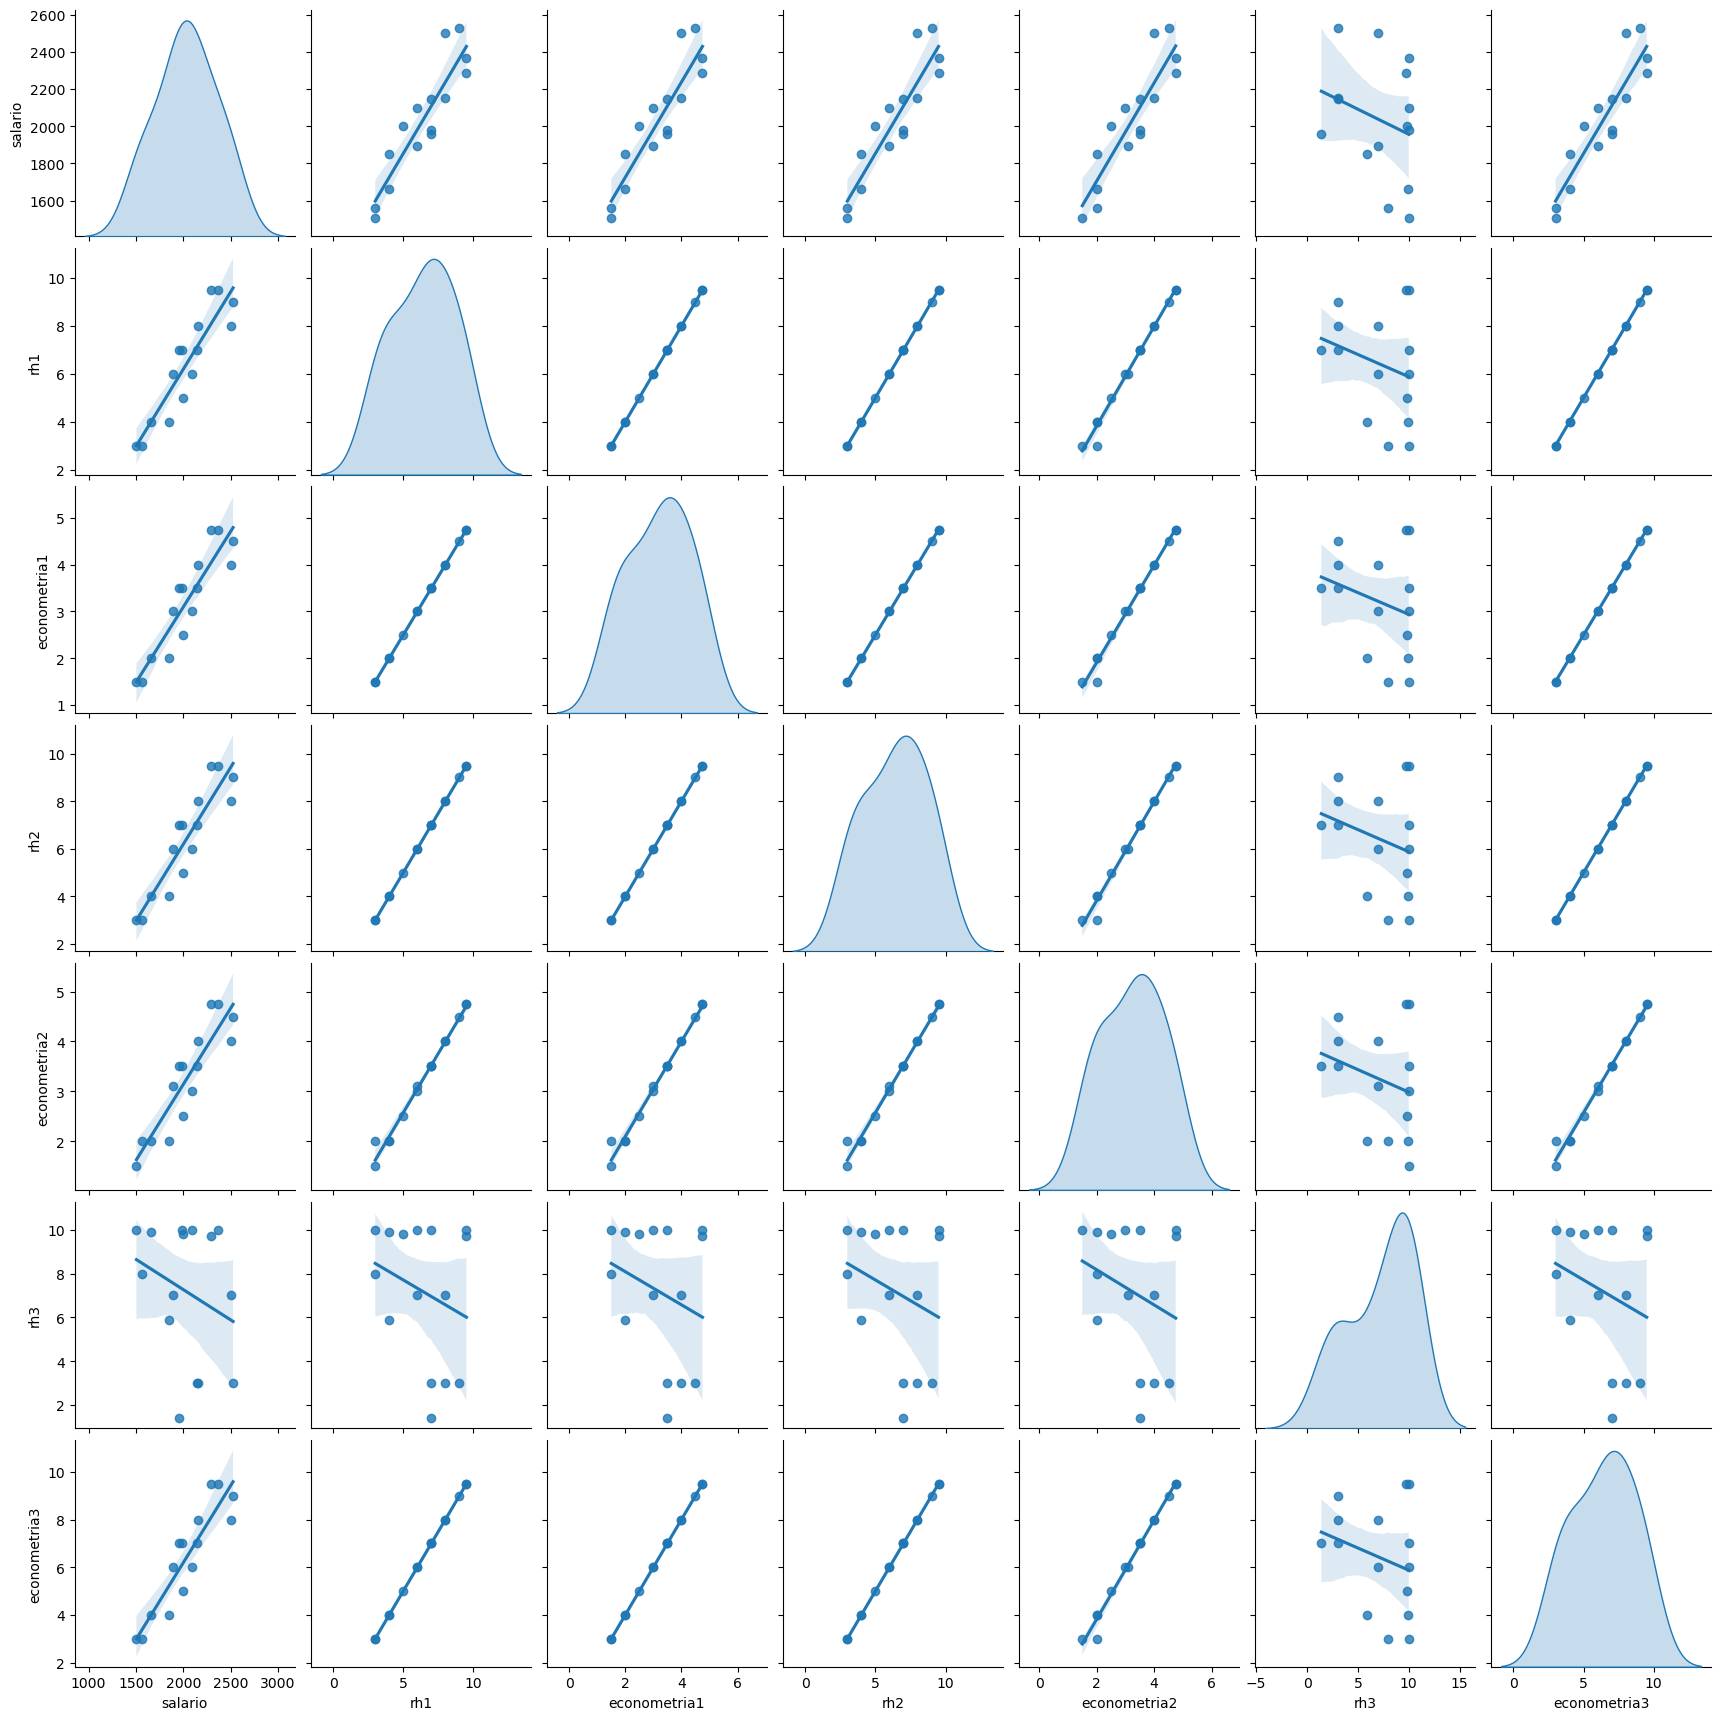

In [6]:
#Scatter Matrix
sns.pairplot(salarios.iloc[:,1:], diag_kind='kde', kind='reg')
plt.show()

## Modelo 1

Correlação Perfeita

In [11]:
#Estimando o modelo
#https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html#statsmodels.regression.linear_model.OLS
import statsmodels.api as sm

modelo1 = sm.OLS.from_formula(formula = 'salario ~ rh1+econometria1', data=salarios).fit()
modelo1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                salario   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     61.85
Date:                Wed, 01 Mar 2023   Prob (F-statistic):           2.69e-06
Time:                        19:11:46   Log-Likelihood:                -93.807
No. Observations:                  15   AIC:                             191.6
Df Residuals:                      13   BIC:                             193.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1213.7997    109.752     11.060      0.000     976.696    1450.904
rh1            102.2939     13.007      7.865      0.000      74.194     130.394
econometria1    51.1469      6.504      7.865      0.000      37.097      65.197
==============================================================================
Omnibus:                        2.049   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.359   Jarque-Bera (JB):                1.492
Skew:                           0.601   Prob(JB):                        0.474
Kurtosis:                       2.028   Cond. No.                     2.30e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.64e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Diagnóstico de Multicolinearidade (variance inflation factor e Tolerance)

Tolerance = 1 - R2 do  modelo X1(X2). Exemplo: R2 modelo rh3 ~ econometria3 = 0.070265 <br>
Tolerance = 1 - 0.070265 = 0.92973

Varia de 1 a 0

Quanto mais próximo de 1, significa que menor foi o R2 de uma preditora contra a outra, ou seja, uma multicolinearidade muito baixa.

VIF = 1/Tolerance
Varia de 1 a + infinito

Se o VIF for próximo de 1 o R2 entre as variáveis preditoras foi muito baixo e não existe colinearidade

Se o VIF for infinito o R2 foi zero então o R2 foi alto e existe correlação perfeita entre as variáveis preditoras

In [64]:
#Necessário inserir coluna para constante no cálculo do VIF e do Tolerance
variaveis3 = salarios[['rh1', 'econometria1']]
variaveis3['const'] = 1

# Calcula o VIF e a tolerância
vif = pd.DataFrame()
vif["features"] = variaveis3.columns
vif["VIF Factor"] = [variance_inflation_factor(variaveis3.values, i) for i in range(variaveis3.shape[1])]
vif["Tolerance"] = 1/vif["VIF Factor"]
vif = vif.drop(vif[vif['features'] == 'const'].index)

# Exibe os resultados
vif

,features,VIF Factor,Tolerance
0,rh1,inf,0.0
1,econometria1,inf,0.0


## Modelo 3

Baixa Correlação

In [12]:
modelo3 = sm.OLS.from_formula(formula = 'salario ~ rh3+econometria3', data=salarios).fit()
modelo3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                salario   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     28.77
Date:                Wed, 01 Mar 2023   Prob (F-statistic):           2.64e-05
Time:                        19:16:28   Log-Likelihood:                -93.759
No. Observations:                  15   AIC:                             193.5
Df Residuals:                      12   BIC:                             195.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1246.6172    163.783      7.611      0.000     889.765    1603.469
rh3             -3.4184     12.263     -0.279      0.785     -30.137      23.300
econometria3   126.5746     17.494      7.235      0.000      88.459     164.691
==============================================================================
Omnibus:                        1.817   Durbin-Watson:                   1.536
Prob(Omnibus):                  0.403   Jarque-Bera (JB):                1.396
Skew:                           0.597   Prob(JB):                        0.498
Kurtosis:                       2.101   Cond. No.                         45.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Stepwise

In [13]:
modelo3 = sm.OLS.from_formula(formula = 'salario ~ econometria3', data=salarios).fit()
modelo3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                salario   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     61.85
Date:                Wed, 01 Mar 2023   Prob (F-statistic):           2.69e-06
Time:                        19:18:45   Log-Likelihood:                -93.807
No. Observations:                  15   AIC:                             191.6
Df Residuals:                      13   BIC:                             193.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1213.7997    109.752     11.060      0.000     976.696    1450.904
econometria3   127.8673     16.259      7.865      0.000      92.742     162.992
==============================================================================
Omnibus:                        2.049   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.359   Jarque-Bera (JB):                1.492
Skew:                           0.601   Prob(JB):                        0.474
Kurtosis:                       2.028   Cond. No.                         21.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Diagnóstico de Multicolinearidade (variance inflation factor e Tolerance)

Tolerance = 1 - R2 do  modelo X1(X2). Exemplo: R2 modelo rh3 ~ econometria3 = 0.070265 <br>
Tolerance = 1 - 0.070265 = 0.92973

Varia de 1 a 0

Quanto mais próximo de 1, significa que menor foi o R2 de uma preditora contra a outra, ou seja, uma multicolinearidade muito baixa.

VIF = 1/Tolerance
Varia de 1 a + infinito

Se o VIF for próximo de 1 o R2 entre as variáveis preditoras foi muito baixo e não existe colinearidade

Se o VIF for infinito o R2 foi zero então o R2 foi alto e existe correlação perfeita entre as variáveis preditoras

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Necessário inserir coluna para constante no cálculo do VIF e do Tolerance
variaveis3 = salarios[['rh3', 'econometria3']]
variaveis3['const'] = 1

# Calcula o VIF e a tolerância
vif = pd.DataFrame()
vif["features"] = variaveis3.columns
vif["VIF Factor"] = [variance_inflation_factor(variaveis3.values, i) for i in range(variaveis3.shape[1])]
vif["Tolerance"] = 1/vif["VIF Factor"]
vif = vif.drop(vif[vif['features'] == 'const'].index)

# Exibe os resultados
vif

,features,VIF Factor,Tolerance
0,rh3,1.075576,0.929735
1,econometria3,1.075576,0.929735


### Exemplo Cálculo da Tolerância

In [41]:
modelo_aux3 = sm.OLS.from_formula(formula = 'rh3 ~ econometria3', data=salarios).fit()
modelo_aux3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    rh3   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.9825
Date:                Wed, 01 Mar 2023   Prob (F-statistic):              0.340
Time:                        19:43:40   Log-Likelihood:                -37.523
No. Observations:                  15   AIC:                             79.05
Df Residuals:                      13   BIC:                             80.46
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        9.6001      2.575      3.728      0.003       4.037      15.164
econometria3    -0.3781      0.382     -0.991      0.340      -1.202       0.446
==============================================================================
Omnibus:                        2.062   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.357   Jarque-Bera (JB):                1.177
Skew:                          -0.368   Prob(JB):                        0.555
Kurtosis:                       1.841   Cond. No.                         21.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
#Tolerance e VIF
print(f'Tolerance: {1 - modelo_aux3.rsquared}')
print(f'VIF: {1/(1 - modelo_aux3.rsquared)}')

Tolerance: 0.9297346300260827
VIF: 1.075575726346717


## Modelo 2

Correlação quase perfeita

Nesse caso a significância do teste F é menor 0,05 sugerindo que pelo menos 1 beta é significativamente diferente de zero, no entanto no teste T nenhum dos betas são estatisticamente diferentes de zero.

**Esse é o principal indício de uma multicolinearidade quase perfeita.**

In [68]:
modelo2 = sm.OLS.from_formula(formula = 'salario ~ rh2+econometria2', data=salarios).fit()
modelo2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                salario   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     29.10
Date:                Wed, 01 Mar 2023   Prob (F-statistic):           2.50e-05
Time:                        20:24:19   Log-Likelihood:                -93.688
No. Observations:                  15   AIC:                             193.4
Df Residuals:                      12   BIC:                             195.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1241.8527    130.172      9.540      0.000     958.233    1525.473
rh2            194.0845    152.087      1.276      0.226    -137.285     525.454
econometria2  -139.4577    318.348     -0.438      0.669    -833.079     554.164
==============================================================================
Omnibus:                        1.720   Durbin-Watson:                   1.616
Prob(Omnibus):                  0.423   Jarque-Bera (JB):                1.309
Skew:                           0.554   Prob(JB):                        0.520
Kurtosis:                       2.068   Cond. No.                         75.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
#Necessário inserir coluna para constante no cálculo do VIF e do Tolerance
variaveis3 = salarios[['rh2', 'econometria2']]
variaveis3['const'] = 1

# Calcula o VIF e a tolerância
vif = pd.DataFrame()
vif["features"] = variaveis3.columns
vif["VIF Factor"] = [variance_inflation_factor(variaveis3.values, i) for i in range(variaveis3.shape[1])]
vif["Tolerance"] = 1/vif["VIF Factor"]
vif = vif.drop(vif[vif['features'] == 'const'].index)

# Exibe os resultados
vif

,features,VIF Factor,Tolerance
0,rh2,82.061458,0.012186
1,econometria2,82.061458,0.012186


### Stepwise

Retirando uma das variáveis, o modelo é válido.

In [72]:
modelo2_step = sm.OLS.from_formula(formula = 'salario ~ rh2', data=salarios).fit()
modelo2_step.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                salario   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     61.85
Date:                Wed, 01 Mar 2023   Prob (F-statistic):           2.69e-06
Time:                        20:43:38   Log-Likelihood:                -93.807
No. Observations:                  15   AIC:                             191.6
Df Residuals:                      13   BIC:                             193.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1213.7997    109.752     11.060      0.000     976.696    1450.904
rh2          127.8673     16.259      7.865      0.000      92.742     162.992
==============================================================================
Omnibus:                        2.049   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.359   Jarque-Bera (JB):                1.492
Skew:                           0.601   Prob(JB):                        0.474
Kurtosis:                       2.028   Cond. No.                         21.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""